In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import pandas as pd
import numpy as np

In [44]:
reviews = pd.read_csv('reviews-and-ratings.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
reviews.dropna(subset=['text', 'rating'], inplace=True)

In [45]:
reviews.head()

,text,rating
0,"Парфюм оригинальный. Всё, как в профессиональн...",5
1,Мой любимый DKNY. Запах просто шикарный. Спаси...,5
4,"Запах просто классный, как раз то, что мне нуж...",4
5,"Парфюм хороший, оригинал! Магазин Parfum-Shop-...",5
6,Доставка работает супер!,5


<Axes: >

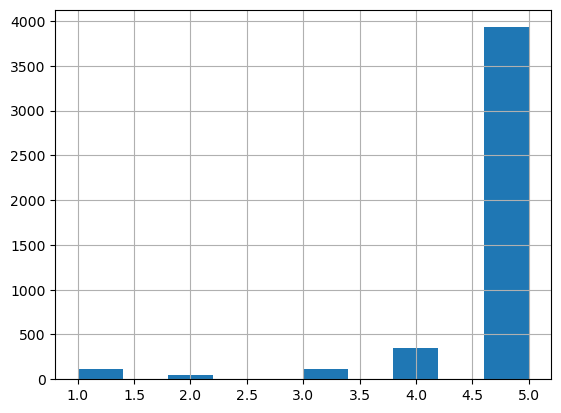

In [46]:
reviews['rating'].hist()

In [47]:
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=56)

In [48]:
labeled_reviews.head()

,text,rating
6436,"Купил сыну, очень нравится",5
7030,Телефон очень удобный!,4
601,Все понравилось. Доставили быстро.,5
4001,"Мне нравится Huawei, он у меня не первый.",5
2556,"Тот самый, мой любимый аромат.",5


In [49]:
def train_model(labeled_data, vect=None):
    if vect is None:
        vect = TfidfVectorizer()
        x = vect.fit_transform(labeled_data['text'])
    else:
        x = vect.transform(labeled_data['text'])
        
    y = labeled_data['rating']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [50]:
x_unlabeled = vect.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [51]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [52]:
uncertainly

array([1.42288727, 0.71178131, 0.46833177, ..., 0.99358308, 0.74279008,
       0.57545489])

In [53]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[100:]]

In [54]:
labeled_reviews_new

,text,rating
6138,"Отличный телефон, просто супер",5
4672,"Отличный телефон, просто супер.",5
7674,"Отличный телефон, супер!",5
7492,Отличный телефон. Супер,5
1618,"Аромат супер, мне очень понравилось. Спасибо, ...",5
...,...,...
7774,Телефон просто супер!,4
6193,Телефон просто супер,5
5439,Телефон просто супер!,5
9067,Телефон просто супер,5


In [55]:
labeled_marks = pd.concat([labeled_reviews, labeled_reviews_new])

In [56]:
model, vect = train_model(labeled_marks, vect)

In [57]:
marks_test = unlabeled_reviews

In [58]:
   print(f"Number of features in training set: {model.n_features_in_}")
   print(f"Number of features in unlabeled set: {x_unlabeled.shape[1]}")

Number of features in training set: 2323
Number of features in unlabeled set: 2323


In [59]:
x_test = vect.transform(marks_test['text'])

y_test_predicted = model.predict(x_test)

In [60]:
print (marks_test)
print(y_test_predicted)

                                                   text  rating
3461  В целом довольна, а на эти минусы можно закрыт...       5
6173                                 Күшті, бізге ұнады       5
3351                    Всем советую, хороший смартфон.       5
5350                                  Телефон өте жақсы       5
3641                      Понравились подарочные бонусы       5
...                                                 ...     ...
8626                     Все соответствует по описанию.       3
1492  Запах великолепный. Пользуюсь уже немало време...       5
7640  Стоит дважды подумать перед покупкой этого апп...       5
6862                          Вполне стоит своих денег.       5
5423                                            Хороший       5

[3640 rows x 2 columns]
[5 5 5 ... 5 5 5]


In [61]:
f1 = f1_score(marks_test['rating'], y_test_predicted, average='weighted')
f1

0.8031386581822134